In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
nw=pd.read_csv("temperatures.csv")

In [3]:
nw.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1959.000000,23.687436,25.597863,29.085983,31.975812,33.565299,32.774274,31.035897,30.507692,30.486752,29.766581,27.285470,24.608291,29.181368,24.629573,31.517607,31.198205,27.208120
std,33.919021,0.834588,1.150757,1.068451,0.889478,0.724905,0.633132,0.468818,0.476312,0.544295,0.705492,0.714518,0.782644,0.555555,0.911239,0.740585,0.420508,0.672003
min,1901.000000,22.000000,22.830000,26.680000,30.010000,31.930000,31.100000,29.760000,29.310000,29.070000,27.900000,25.700000,23.020000,28.110000,22.250000,29.920000,30.240000,25.740000
25%,1930.000000,23.100000,24.780000,28.370000,31.460000,33.110000,32.340000,30.740000,30.180000,30.120000,29.380000,26.790000,24.040000,28.760000,24.110000,31.040000,30.920000,26.700000
50%,1959.000000,23.680000,25.480000,29.040000,31.950000,33.510000,32.730000,31.000000,30.540000,30.520000,29.780000,27.300000,24.660000,29.090000,24.530000,31.470000,31.190000,27.210000
75%,1988.000000,24.180000,26.310000,29.610000,32.420000,34.030000,33.180000,31.330000,30.760000,30.810000,30.170000,27.720000,25.110000,29.470000,25.150000,31.890000,31.400000,27.610000
max,2017.000000,26.940000,29.720000,32.620000,35.380000,35.840000,34.480000,32.760000,31.840000,32.220000,32.290000,30.110000,28.010000,31.630000,28.330000,34.570000,32.410000,30.030000


<Axes: title={'center': 'Top 10 temperature records'}, xlabel='YEAR', ylabel='ANNUAL'>

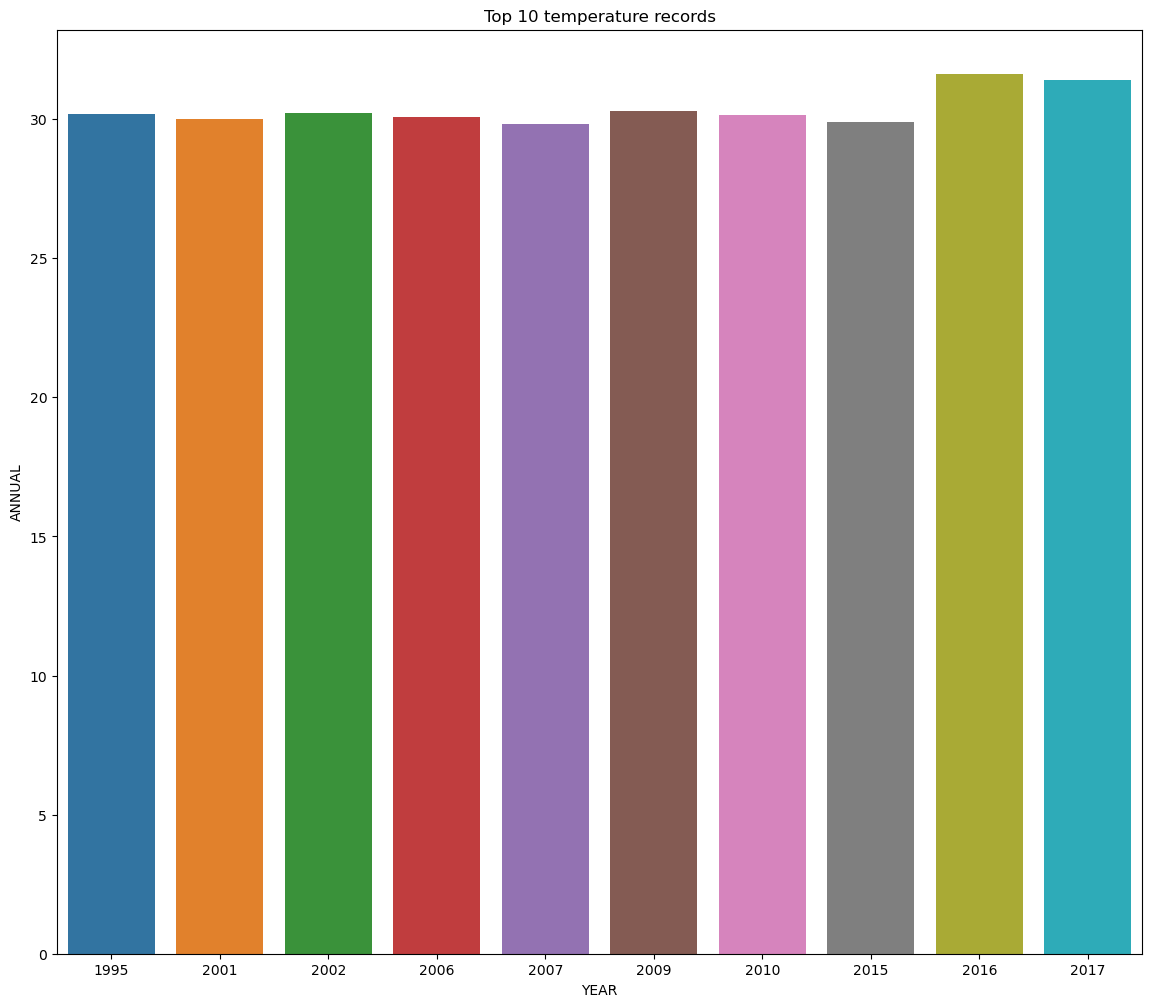

In [8]:
top_10_data=nw.nlargest(10,'ANNUAL')
plt.figure(figsize=(14,12))
plt.title("Top 10 temperature records")
sbn.barplot(x=top_10_data.YEAR,y=top_10_data.ANNUAL)

In [9]:
from sklearn.model_selection import train_test_split

In [11]:
x=nw[['YEAR']]
y=nw[['JAN']]

In [12]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=1,test_size=0.2)

In [13]:
len(xtrain)

93

In [15]:
len(ytrain)

93

In [16]:
from sklearn import linear_model,metrics

In [17]:
reg= linear_model.LinearRegression()

In [18]:
model = reg.fit(xtrain,ytrain)
r_sq=reg.score(xtrain,ytrain)
print("determination coefficient",r_sq)

determination coefficient 0.35480458491221156


In [20]:
print("intercept",model.intercept_)

intercept [-5.35338281]


In [21]:
print("slope",model.coef_)

slope [[0.01486008]]


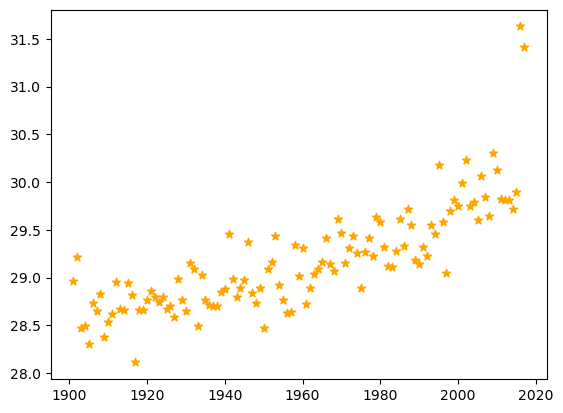

In [23]:
plt.scatter(nw.YEAR,nw.ANNUAL,marker='*',color='orange')

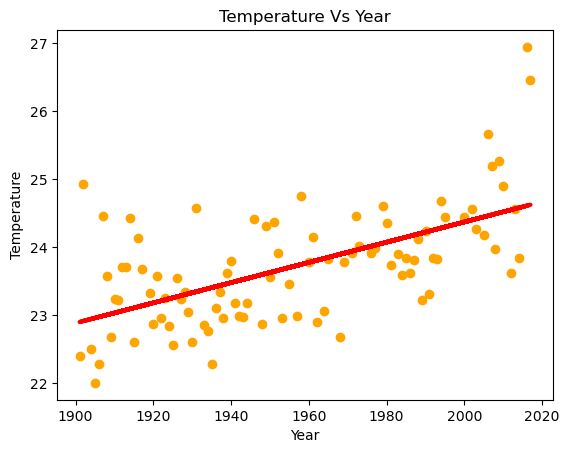

In [27]:
plt.scatter(xtrain,ytrain,color='orange')
plt.plot(xtrain,reg.predict(xtrain),color='red',linewidth=3)
plt.title("Temperature Vs Year")
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.show()

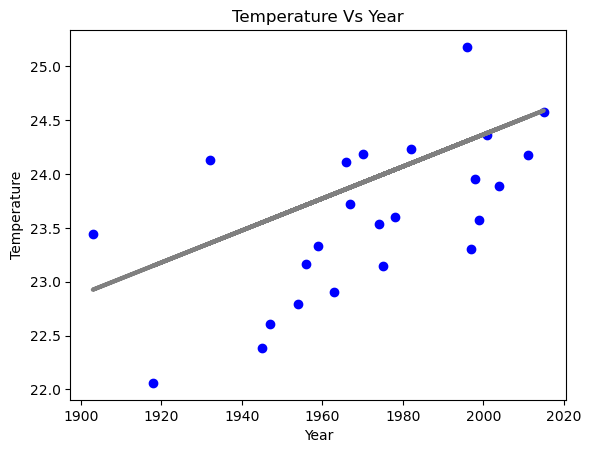

In [28]:
plt.scatter(xtest,ytest,color='blue')
plt.plot(xtest,reg.predict(xtest),color='grey',linewidth=3)
plt.title("Temperature Vs Year")
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.show()

In [29]:
y_pred=model.predict(xtest)

In [30]:
print("Mean Absolute Error:"),metrics.mean_absolute_error(y_pred,ytest)

Mean Absolute Error:


(None, 0.575735016242341)

In [31]:
print("Mean Squared Error:"),metrics.mean_squared_error(y_pred,ytest)

Mean Squared Error:


(None, 0.4474127538283697)

In [32]:
print("Root Mean Squared Error:"),np.sqrt(metrics.mean_squared_error(y_pred,ytest))

Root Mean Squared Error:


(None, 0.6688891939838538)